In [15]:
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import norm
from scipy import stats
from scipy.stats.stats import pearsonr
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

df = pd.read_csv('kc_house_data_train.csv', index_col = 0)


In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:


# for l in df.columns:
#     ax.title = l
#     if (l != 'price'):
#         ax = sns.lmplot(x=l, y='price', data=df,fit_reg=True).fig
        

In [5]:
df['yr_renovated'].value_counts()

0       16564
2014       71
2007       32
2005       32
2000       31
        ...  
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, Length: 69, dtype: int64

In [6]:
sns.distplot()

TypeError: distplot() missing 1 required positional argument: 'a'

In [7]:
target = df['price']
features = df[['bedrooms','bathrooms',
               'sqft_living', 'view','waterfront',
               'floors','condition', 'grade',
              'yr_built']]
features
#features.columns

,bedrooms,bathrooms,sqft_living,view,waterfront,floors,condition,grade,yr_built
0,4,2.25,2070,0,0,2.0,4,8,1986
1,5,3.00,2900,0,0,1.0,5,8,1977
2,4,2.50,3770,2,0,2.0,3,11,1997
3,3,3.50,4560,2,0,2.0,3,12,1990
4,3,2.50,2550,0,0,2.0,3,9,2004
...,...,...,...,...,...,...,...,...,...
17285,5,2.50,3240,1,0,1.0,3,8,1958
17286,2,1.75,1300,0,0,2.0,3,7,1948
17287,3,1.00,1050,0,0,1.0,3,7,1953
17288,3,1.50,1900,0,0,1.5,4,7,1971


In [8]:
#train data and test split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=10, test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 9) Target:  (13832,)
Training set - Features:  (3458, 9) Target:  (3458,)


In [26]:
#linear model
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print ("R^2 Score:", lm.score(X_train, y_train))



6479882.097922107
[-4.17406744e+04  5.06719852e+04  1.71671732e+02  4.10253602e+04
  6.23465267e+05  2.36699004e+04  2.11777137e+04  1.26712805e+05
 -3.73244201e+03]
R^2 Score: 0.6580604218416644


AttributeError: 'LinearRegression' object has no attribute 'summary'

In [10]:
#make predictions from train
y_train_pred = lm.predict(X_train)

#perform tests on prediction
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 140491.80450053126
Mean Squared Error: 47795802549.14699
Root Mean Squared Error: 218622.51153334367


In [11]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.376331803358126
Root Mean Squared Error: 0.5856185299386257


Text(0, 0.5, 'Predictions')

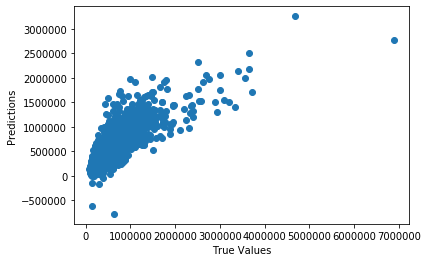

In [12]:
y_pred = lm.predict(X_test)

## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

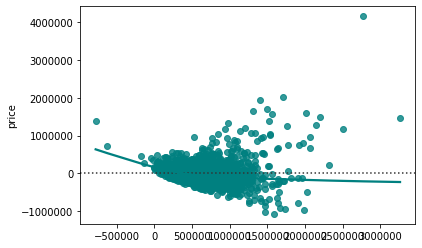

In [13]:
sns.residplot(y_pred, y_test, lowess=True, color="teal")

In [14]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.62352245802451


In [25]:
#calculate correlation coefficient for data
li = []
for key in features.keys():
    li.append("{}: {}".format(key, pearsonr(df['price'], df[key])))
li

['bedrooms: (0.3051057102681552, 0.0)',
 'bathrooms: (0.5243346054984268, 0.0)',
 'sqft_living: (0.7035403039789669, 0.0)',
 'view: (0.3954851030218899, 0.0)',
 'waterfront: (0.275778670804662, 2.465038317624179e-299)',
 'floors: (0.256985071851374, 7.67514444155681e-259)',
 'condition: (0.03609884124957833, 2.0554674592679736e-06)',
 'grade: (0.6662149551378924, 0.0)',
 'yr_built: (0.05645007489461683, 1.1017832792233933e-13)']

In [23]:
features.keys()

Index(['bedrooms', 'bathrooms', 'sqft_living', 'view', 'waterfront', 'floors',
       'condition', 'grade', 'yr_built'],
      dtype='object')

In [19]:
for key in features.keys():
    print(key)

bedrooms
bathrooms
sqft_living
view
waterfront
floors
condition
grade
yr_built
